In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np
from datetime import datetime
from metpy.units import units

In [4]:
# Database file
weewx_archive_path = 'weewx.sdb'

# Specify Start and End Time
startTime = int(datetime(2020, 7, 16, 16, 3).timestamp()) #Inclusive start time
endTime   = int(datetime(2020, 7, 16, 16, 40).timestamp()) #Exclusive end time

In [5]:
con = sqlite3.connect(weewx_archive_path)
df = pd.read_sql_query(f'SELECT * from archive WHERE (datetime>={startTime}) & (datetime<={endTime})', con, parse_dates=['dateTime'])
con.close()
df

,dateTime,usUnits,interval,barometer,pressure,altimeter,inTemp,outTemp,inHumidity,outHumidity,...,hail,hailRate,heatingTemp,heatingVoltage,supplyVoltage,referenceVoltage,windBatteryStatus,rainBatteryStatus,outTempBatteryStatus,inTempBatteryStatus
0,2020-07-16 20:03:00,1,1,NaN,NaN,NaN,80.5,72.6,61.0,86.0,...,None,None,None,None,None,None,None,None,None,None
1,2020-07-16 20:04:00,1,1,29.994000,28.846473,30.042820,80.6,72.6,61.0,86.0,...,None,None,None,None,None,None,None,None,None,None
2,2020-07-16 20:05:00,1,1,29.995000,28.847435,30.043814,80.8,72.6,61.0,86.0,...,None,None,None,None,None,None,None,None,None,None
3,2020-07-16 20:06:00,1,1,29.995000,28.847553,30.043936,80.8,72.6,61.0,87.0,...,None,None,None,None,None,None,None,None,None,None
4,2020-07-16 20:07:00,1,1,29.995000,28.847435,30.043814,80.8,72.6,61.0,86.0,...,None,None,None,None,None,None,None,None,None,None
5,2020-07-16 20:08:00,1,1,29.995000,28.847553,30.043936,80.8,72.6,61.0,87.0,...,None,None,None,None,None,None,None,None,None,None
6,2020-07-16 20:09:00,1,1,29.993000,28.845630,30.041948,80.8,72.6,61.0,87.0,...,None,None,None,None,None,None,None,None,None,None
7,2020-07-16 20:10:00,1,1,29.994000,28.846591,30.042942,80.9,72.6,61.0,87.0,...,None,None,None,None,None,None,None,None,None,None
8,2020-07-16 20:11:00,1,1,29.993000,28.845630,30.041948,80.9,72.6,61.0,87.0,...,None,None,None,None,None,None,None,None,None,None
9,2020-07-16 20:12:00,1,1,29.994000,28.846591,30.042942,80.9,72.6,61.0,87.0,...,None,None,None,None,None,None,None,None,None,None


In [4]:
# Set units
t=df['dateTime']
T=df['outTemp'].values*units('degF')
Td=df['dewpoint'].values*units('degF')
prcp=df['rain'].values*units('inches')
windSpd=df['windSpeed'].values*units('mph')
windGst=df['windGust'].values*units('mph')
windDir=df['windDir']
mslp=(df['barometer'].values*units('inHg')).to('hPa')


# Get precip accumulation
prcp_accum=prcp
for i in range(len(prcp_accum)):
    if i > 0:
        prcp_accum[i] = prcp_accum[i] + prcp_accum[i-1]


# Check if wind gust > wind speed
for i in range(len(windGst)):
    if windGst[i] <= windSpd[i]:
        windGst[i] = np.NaN

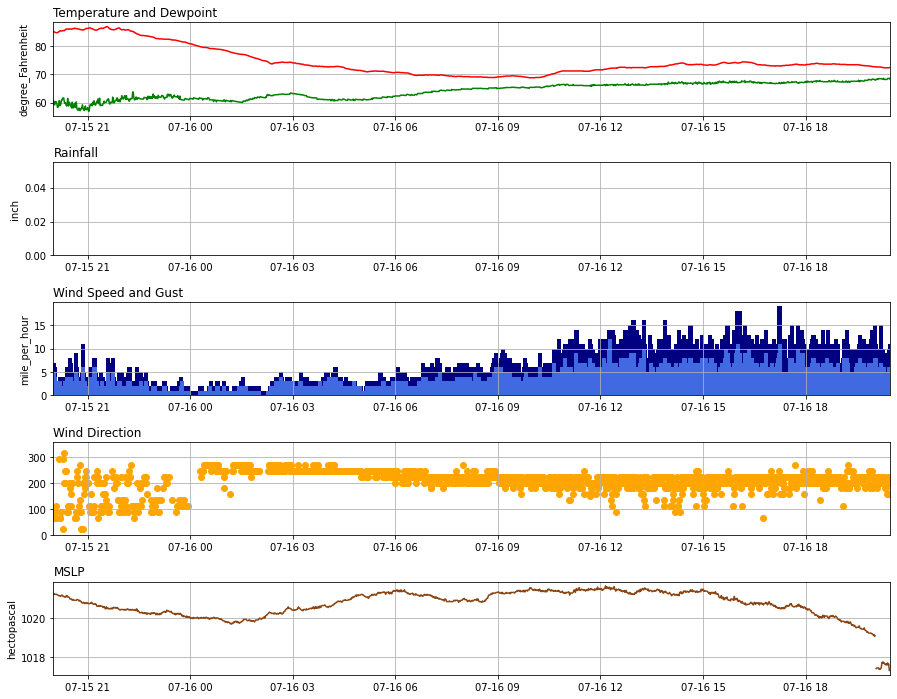

In [8]:
# Make Plot
axs=range(5)
fig, axs = plt.subplots(figsize=(15, 12), nrows=len(axs))
plt.subplots_adjust(hspace=0.5)

axs[0].plot(t, T, color='red')
axs[0].plot(t, Td, color='green')
axs[0].set_title('Temperature and Dewpoint', loc='left')

axs[1].bar(t, prcp_accum, color='green', width=0.005)
axs[1].set_ylim(bottom=0)
axs[1].set_title('Rainfall', loc='left')

axs[2].bar(t, windGst, color='navy', width=0.005)
axs[2].bar(t, windSpd, color='royalblue', width=0.005)
axs[2].set_ylim(bottom=0)
axs[2].set_title('Wind Speed and Gust', loc='left')

axs[3].scatter(t, windDir, color='orange')
axs[3].set_ylim(0, 360)
axs[3].set_title('Wind Direction', loc='left')

axs[4].plot(t, mslp, color='saddlebrown')
axs[4].set_title('MSLP', loc='left')

for ax in axs:
    ax.set_xlim(t[0], t[len(t)-1]) 
    plt.setp(ax.get_xticklabels(), rotation=0)
    ax.grid()
    
#plt.suptitle(f'{file}', y=0.92)

plt.show()